In [5]:
import numpy as np
import csv

data = []

with open('E-MTAB-5214-query-results.tpms.tsv') as fid:
    csvfile = csv.reader(fid, delimiter= '\t')
    for line in csvfile:
        data.append(line)
data = np.array(data)

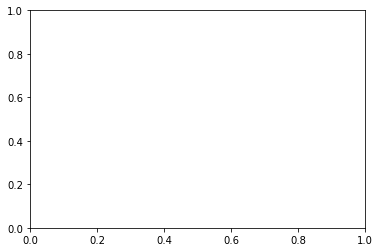

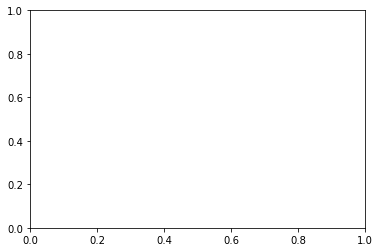

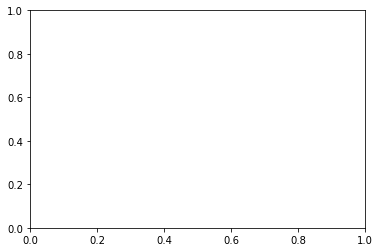

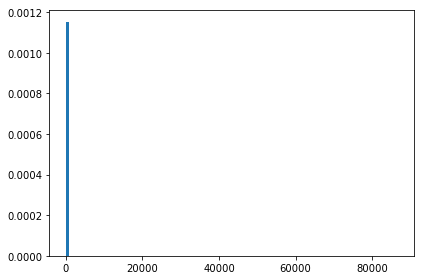

In [8]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


num_bins = 100

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist([float(x) for x in data[:,2] if x], num_bins, normed=1)


# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()
